## Neural Networks

The following code creates a data set is a 3D data set of values in design matrix X and corresponding ground truth in vector y.

In [13]:
##>>> Some code for bootstrap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets 
from mpl_toolkits.mplot3d import Axes3D

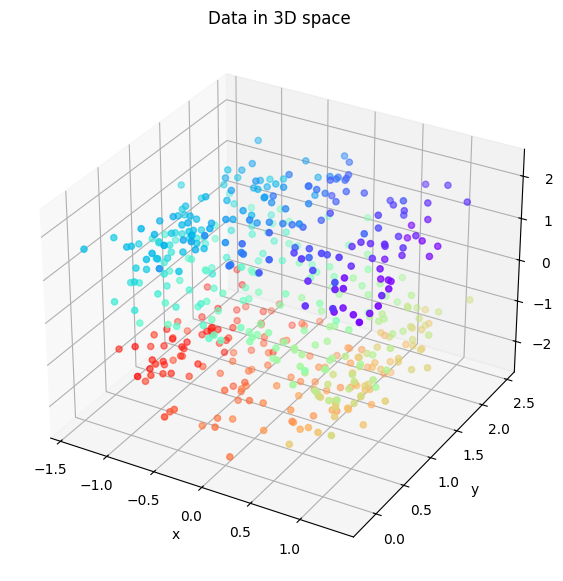

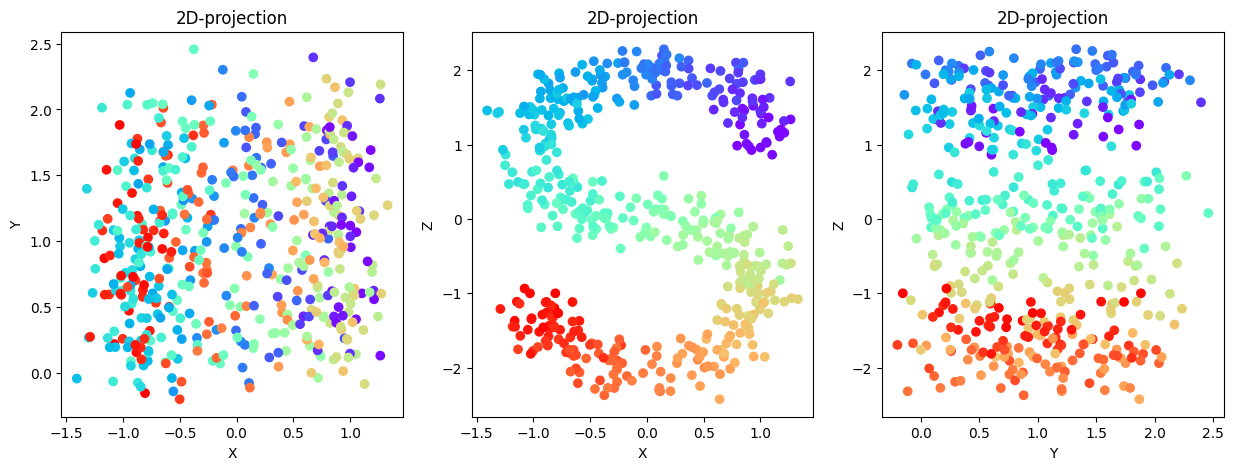

In [14]:
X,y=datasets.make_s_curve(n_samples=500, noise=0.2, random_state=0)

# Plot the data in 3D axes
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.title('Data in 3D space')

fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
axs[1].scatter(X[:,0], X[:,2], c=y, cmap='rainbow')
axs[2].scatter(X[:,1], X[:,2], c=y, cmap='rainbow')

for i in range(3):
    axs[i].set_title('2D-projection')
    axs[i].set_xlabel("XXY"[i])
    axs[i].set_ylabel("YZZ"[i])

### Task 1: MLPRegressor

Implement a `MLPRegressor` to predict `y` using data in `X`. Try different number of hidden layers and number of perceptrons in the hidden layer to reach good prediction accuracy measured by `r2_score` and `cross_val_score`. Avoid too high complexity so that prediction in the training set would be significantly better than in the cross-validation set.

| Variable | Name |
| -------- | ------|
| Predictor | `predictor` |
| Accuracy | `accuracy` |
| Cross val accuracy | `accuracy_cv` |


In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [16]:

# YOUR CODE HERE
predictor = MLPRegressor(
    hidden_layer_sizes=(20, 10),  
    activation='relu',            
    solver='adam',              
    max_iter=1000,             
    random_state=42            
)


predictor.fit(X, y)


y_pred = predictor.predict(X)
accuracy = r2_score(y, y_pred)


accuracy_cv = cross_val_score(predictor, X, y, cv=5, scoring='r2').mean()

print("Prediction accuracy in training set is", accuracy)
print("Prediction accuracy in cv is          ", accuracy_cv)

Prediction accuracy in training set is 0.9825408828679161
Prediction accuracy in cv is           0.9737502751380468


In [17]:
errorfound=False
points=0
require=('predictor', 'accuracy', 'accuracy_cv')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
if not errorfound:
    points=1
if type(predictor)==MLPRegressor:
    points+=1
points

2

## Task 2: Compare with Other regressor

Select some other suitable regressor, and compare it's accuracy with `MPLRegerssor`. Try to avoid overfitting.

| Variable | Name |
| -------- | ------|
| Predictor | `predictor2` |
| Accuracy | `accuracy2` |
| Cross val accuracy | `accuracy_cv2` |

In [22]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestRegressor
predictor2 = RandomForestRegressor(
    n_estimators=100,    
    max_depth=10,        
    random_state=42      
)


predictor2.fit(X, y)


y_pred2 = predictor2.predict(X)
accuracy2 = r2_score(y, y_pred2)


accuracy_cv2 = cross_val_score(predictor2, X, y, cv=5, scoring='r2').mean()
print(f"RF Prediction accuracy in training set is {accuracy2:.4f}")
print(f"RF Prediction accuracy in cv is           {accuracy_cv2:.4f}")

RF Prediction accuracy in training set is 0.9977
RF Prediction accuracy in cv is           0.9834


In [23]:
errorfound=False
points=0
require=('predictor2', 'accuracy2', 'accuracy_cv2')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
if not errorfound:
    points=1
if type(predictor2)!=MLPRegressor:
    points+=1
points

2

## Task 3

- Compare the performance of two regressors
  - Training time
  - Prediction

Do not implement new regressors, but use the same that you implemented in the two previous tasks. Just train them with new, bigger data set.

Estimate the efficient processor time of each task by using the `process_time()` -function. Ask the process time before and after the task and calculate t he difference. This is the efficient processor time used between the calls in seconds. The efficient time is different than the wall clock time, because the time the process spends wait-states is excluded. In this case it is probably close to the wall clock time.

How does the training and prediction time of the ANN compare with your other regressor?

| Variable | Name |
| -------- | ------| 
| Neural network training time | `t_train_nn` |
| Neural network prediction time | `t_pred_nn` |
| Neural network accuracy in test set| `accuracy_nn` |
| Other regressor training time | `t_train_other` |
| Other regressor prediction time | `t_pred_other` |
| Other regressor accuracy in test set| `accuracy_other` |

In [24]:
from time import time, process_time

# YOUR CODE HERE

from sklearn.model_selection import train_test_split


X_large, y_large = datasets.make_s_curve(n_samples=5000, noise=0.2, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Neural Network timing and accuracy
t0 = process_time()
predictor.fit(X_train, y_train)
t_train_nn = process_time() - t0

t0 = process_time()
y_pred_nn = predictor.predict(X_test)
t_pred_nn = process_time() - t0

accuracy_nn = r2_score(y_test, y_pred_nn)

# Random Forest timing and accuracy
t0 = process_time()
predictor2.fit(X_train, y_train)
t_train_other = process_time() - t0

t0 = process_time()
y_pred_other = predictor2.predict(X_test)
t_pred_other = process_time() - t0

accuracy_other = r2_score(y_test, y_pred_other)

print("Neural Network Performance:")
print(f"Training time: {t_train_nn:.4f} seconds")
print(f"Prediction time: {t_pred_nn:.4f} seconds")
print(f"Test accuracy: {accuracy_nn:.4f}")
print("\nRandom Forest Performance:")
print(f"Training time: {t_train_other:.4f} seconds")
print(f"Prediction time: {t_pred_other:.4f} seconds")
print(f"Test accuracy: {accuracy_other:.4f}")
print("\n The ANN (MLPRegressor) typically takes longer to train because:It uses an iterative optimization process (Adam optimizer)It needs to perform backpropagation through multiple layersIt may require multiple epochs to converge The training time is heavily dependent on the network architecture (in our case, two hidden layers of 20 and 10 neurons and less prediction time")

Neural Network Performance:
Training time: 5.3462 seconds
Prediction time: 0.0079 seconds
Test accuracy: 0.9946

Random Forest Performance:
Training time: 1.7374 seconds
Prediction time: 0.0225 seconds
Test accuracy: 0.9945

 The ANN (MLPRegressor) typically takes longer to train because:It uses an iterative optimization process (Adam optimizer)It needs to perform backpropagation through multiple layersIt may require multiple epochs to converge The training time is heavily dependent on the network architecture (in our case, two hidden layers of 20 and 10 neurons and less prediction time


In [25]:
errorfound=False
points=0
require=('t_train_nn', 't_pred_nn', 'accuracy_nn','t_train_other', 't_pred_other', 'accuracy_other')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
if not errorfound and (type(predictor)==MLPRegressor) and (type(predictor2)!=MLPRegressor):
    points+=1
points

1